In [122]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install yfinance

In [123]:
import numpy as np
import pandas as pd
from matplotlib import style
import datetime
import pandas_datareader.data as web
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [124]:
import yfinance as yf
import csv

# Define the stock ticker and the date range
ticker = 'BBCA.JK'
train_start_date = '2010-01-04'
train_end_date = '2019-12-01'

test_start_date = '2020-01-02'
test_end_date = '2022-12-01'

validation_start_date = '2023-01-02'
validation_end_date = datetime.date.today()

# Get the data
train_data = yf.download(ticker, start=train_start_date, end=train_end_date)

train_data.to_csv('train_data.csv')


# Get the stock data using yahoo API:
# get 2009-2019 data to train our model
#train_data = web.DataReader('BBCA.JK', 'yahoo', datetime.datetime(2010,1,4),datetime.datetime(2019,12,1)) 

# get 2020 data to present date to test the SVM model
# test_data = web.DataReader('BBCA.JK', 'yahoo',  datetime.datetime(2020,1,2), datetime.date.today()) 
test_data = yf.download(ticker, start=test_start_date, end=test_end_date)
#test_data = web.DataReader('BBCA.JK', 'yahoo',  datetime.datetime(2020,1,4), datetime.datetime(2021,12,1)) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [125]:
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1010.0,1010.0,965.0,1010.0,800.359741,77812500
2010-01-05,1020.0,1020.0,990.0,1020.0,808.284180,44442500
2010-01-06,990.0,1020.0,990.0,990.0,784.511108,27782500
2010-01-07,995.0,995.0,965.0,995.0,788.473206,38632500
2010-01-08,970.0,995.0,970.0,970.0,768.662354,27427500
...,...,...,...,...,...,...
2019-11-25,6330.0,6335.0,6275.0,6275.0,5638.061035,55133500
2019-11-26,6330.0,6330.0,6270.0,6285.0,5647.045410,192783500
2019-11-27,6270.0,6300.0,6240.0,6300.0,5660.522461,58833500


In [126]:
test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,6695.0,6780.0,6680.0,6690.0,6029.958496,49445000
2020-01-03,6750.0,6800.0,6725.0,6800.0,6129.105469,47755500
2020-01-06,6720.0,6750.0,6690.0,6735.0,6070.518555,27300000
2020-01-07,6735.0,6770.0,6730.0,6740.0,6075.024902,45022500
2020-01-08,6670.0,6745.0,6670.0,6680.0,6020.943848,53692500
...,...,...,...,...,...,...
2022-11-24,8975.0,9000.0,8950.0,9000.0,8550.542969,53520800
2022-11-25,9000.0,9000.0,8900.0,8975.0,8526.791016,75048300
2022-11-28,9050.0,9100.0,8975.0,9025.0,8574.294922,96209700


In [127]:
# sort by date
train_data = train_data.sort_values('Date')
test_data = test_data.sort_values('Date')

# fix the date 
train_data.reset_index(inplace=True)
train_data.set_index("Date", inplace=True)
test_data.reset_index(inplace=True)
test_data.set_index("Date", inplace=True)

In [128]:
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1010.0,1010.0,965.0,1010.0,800.359741,77812500
2010-01-05,1020.0,1020.0,990.0,1020.0,808.284180,44442500
2010-01-06,990.0,1020.0,990.0,990.0,784.511108,27782500
2010-01-07,995.0,995.0,965.0,995.0,788.473206,38632500
2010-01-08,970.0,995.0,970.0,970.0,768.662354,27427500
...,...,...,...,...,...,...
2019-11-25,6330.0,6335.0,6275.0,6275.0,5638.061035,55133500
2019-11-26,6330.0,6330.0,6270.0,6285.0,5647.045410,192783500
2019-11-27,6270.0,6300.0,6240.0,6300.0,5660.522461,58833500


In [129]:
test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,6695.0,6780.0,6680.0,6690.0,6029.958496,49445000
2020-01-03,6750.0,6800.0,6725.0,6800.0,6129.105469,47755500
2020-01-06,6720.0,6750.0,6690.0,6735.0,6070.518555,27300000
2020-01-07,6735.0,6770.0,6730.0,6740.0,6075.024902,45022500
2020-01-08,6670.0,6745.0,6670.0,6680.0,6020.943848,53692500
...,...,...,...,...,...,...
2022-11-24,8975.0,9000.0,8950.0,9000.0,8550.542969,53520800
2022-11-25,9000.0,9000.0,8900.0,8975.0,8526.791016,75048300
2022-11-28,9050.0,9100.0,8975.0,9025.0,8574.294922,96209700


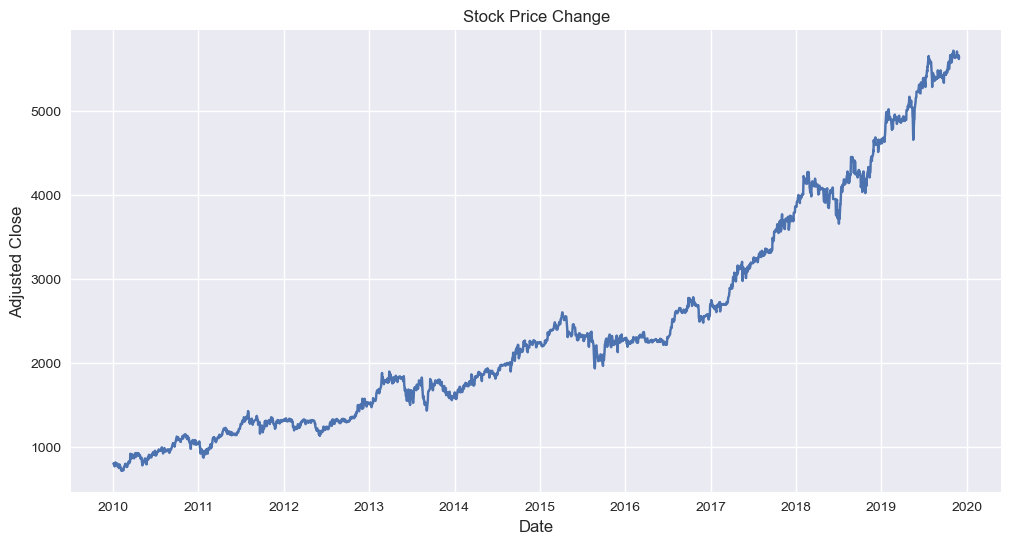

In [130]:
from matplotlib import pyplot as plt

style.use('seaborn')
plt.figure(figsize = (12,6))
plt.plot(train_data["Adj Close"])
plt.title("Stock Price Change")
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Adjusted Close", fontsize = 12)
plt.show()

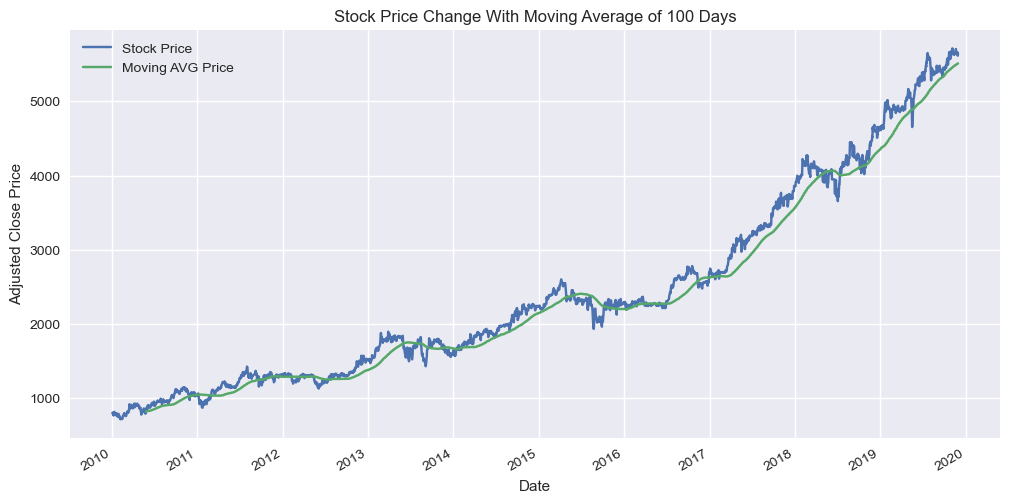

In [131]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg = close_price.rolling(window=100).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 100 Days")
close_price.plot(label='Stock Price')
moving_avg.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

In [132]:
import matplotlib.dates as mdates

# change the dates into ints for training 
indxed_dates = train_data.copy()
indxed_dates = indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
actual_dates = indxed_dates['Date']

# convert to ints
indxed_dates['Date'] = indxed_dates['Date'].map(mdates.date2num)

indxed_dates

,Date,Open,High,Low,Close,Adj Close,Volume
0,14613.0,1010.0,1010.0,965.0,1010.0,800.359741,77812500
1,14614.0,1020.0,1020.0,990.0,1020.0,808.284180,44442500
2,14615.0,990.0,1020.0,990.0,990.0,784.511108,27782500
3,14616.0,995.0,995.0,965.0,995.0,788.473206,38632500
4,14617.0,970.0,995.0,970.0,970.0,768.662354,27427500
...,...,...,...,...,...,...,...
2466,18225.0,6330.0,6335.0,6275.0,6275.0,5638.061035,55133500
2467,18226.0,6330.0,6330.0,6270.0,6285.0,5647.045410,192783500
2468,18227.0,6270.0,6300.0,6240.0,6300.0,5660.522461,58833500
2469,18228.0,6295.0,6295.0,6245.0,6250.0,5615.598145,44248000


In [133]:
# Use sklearn support vector regression to predicit our data:
from sklearn.svm import SVR

dates_data = indxed_dates['Date'].to_numpy()
prices_data = train_data['Adj Close'].to_numpy()

#Convert to 1d Vector
dates_data = np.reshape(dates_data, (len(dates_data), 1))
prices_data = np.reshape(prices_data, (len(prices_data), 1))

In [134]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1e4))
SVR_linear.fit(dates_data, prices_data)
SVR_linear_train = SVR_linear.predict(dates_data)

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
SVR_linear_train

array([ 482.89962887,  483.91838414,  484.93713941, ..., 4164.68116876,
       4165.69992404, 4166.71867929])

In [136]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
SVR_rbfk.fit(dates_data, prices_data)
SVR_rbfk_train = SVR_rbfk.predict(dates_data)

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:
SVR_rbfk_train

array([ 937.78884175,  808.3846757 ,  784.41120979, ..., 5660.42219967,
       5439.03769374, 4955.63778973])

In [138]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=3, epsilon=0.1, coef0=1))
SVR_poly.fit(dates_data, prices_data)
SVR_poly_train = SVR_poly.predict(dates_data)

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
SVR_poly_train

array([ 734.63959779,  735.76168918,  736.88265013, ..., 5794.81955959,
       5798.82071552, 5802.82459624])

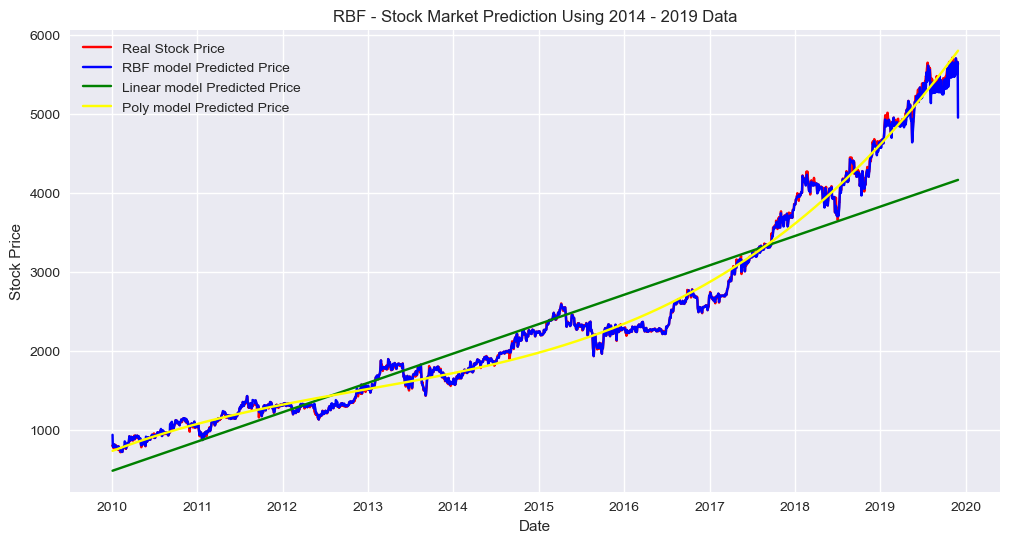

In [140]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2014 - 2019 Data')
plt.plot(dates_data, prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(actual_dates, SVR_rbfk_train, color= 'blue', label= 'RBF model Predicted Price') 
plt.plot(actual_dates, SVR_linear_train, color= 'green', label= 'Linear model Predicted Price') 
plt.plot(actual_dates, SVR_poly_train, color= 'yellow', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [141]:
# change the dates into ints for training 
test_indxed_dates = test_data.copy()
test_indxed_dates = test_indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
test_actual_dates = test_indxed_dates['Date']

# convert to ints
test_indxed_dates['Date'] = test_indxed_dates['Date'].map(mdates.date2num)

In [142]:
test_indxed_dates

,Date,Open,High,Low,Close,Adj Close,Volume
0,18263.0,6695.0,6780.0,6680.0,6690.0,6029.958496,49445000
1,18264.0,6750.0,6800.0,6725.0,6800.0,6129.105469,47755500
2,18267.0,6720.0,6750.0,6690.0,6735.0,6070.518555,27300000
3,18268.0,6735.0,6770.0,6730.0,6740.0,6075.024902,45022500
4,18269.0,6670.0,6745.0,6670.0,6680.0,6020.943848,53692500
...,...,...,...,...,...,...,...
708,19320.0,8975.0,9000.0,8950.0,9000.0,8550.542969,53520800
709,19321.0,9000.0,9000.0,8900.0,8975.0,8526.791016,75048300
710,19324.0,9050.0,9100.0,8975.0,9025.0,8574.294922,96209700
711,19325.0,8975.0,9075.0,8925.0,8975.0,8526.791016,91562100


In [143]:
test_dates_data = test_indxed_dates['Date'].to_numpy()
test_prices_data = test_data['Adj Close'].to_numpy()

#Convert to 1d Vector
test_dates_data = np.reshape(test_dates_data, (len(test_dates_data), 1))
test_prices_data = np.reshape(test_prices_data, (len(test_prices_data), 1))

In [144]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
SVR_rbfk.fit(test_dates_data, test_prices_data)
SVR_rbfk_test = SVR_rbfk.predict(test_dates_data)
SVR_rbfk_test

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6055.47722527, 6129.00569867, 6070.61851023, 6049.61030199,
       6062.76369238, 6074.92527823, 6061.60444095, 6079.63151519,
       6128.95615394, 6160.55180237, 6178.96968062, 6196.60598207,
       6160.7517137 , 6156.24583842, 6165.25822266, 6160.48803981,
       6139.96822868, 6165.05856189, 6164.36869002, 6115.48540368,
       6001.55349683, 5844.98518662, 5804.72258632, 5948.93695377,
       6050.83780625, 6086.74113779, 6092.95174912, 6115.48537353,
       6121.36608931, 6129.00551926, 6119.99168147, 6090.40333812,
       6056.89841554, 6043.33163322, 6016.5314234 , 5988.07492463,
       5962.25773298, 5881.33718789, 5840.86434704, 5786.69707335,
       5728.67753787, 5669.32219147, 5586.10874609, 5696.36279716,
       5804.72276999, 5800.01655855, 5660.48800256, 5354.36034979,
       5340.3329441 , 5242.61101559, 5093.14355051, 5011.54499229,
       5011.34486566, 4774.52977914, 4506.79568174, 4335.48923504,
       4267.94049094, 4095.62090436, 4201.10072816, 4758.97007

In [145]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1))
SVR_linear.fit(test_dates_data, test_prices_data)
SVR_linear_test =  SVR_linear.predict(test_dates_data)
SVR_linear_test

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5754.63547027, 5755.88354291, 5759.62776082, 5760.87583346,
       5762.12390609, 5763.37197873, 5764.62005137, 5768.36426928,
       5769.61234192, 5770.86041456, 5772.10848719, 5773.35655983,
       5777.10077774, 5778.34885038, 5779.59692302, 5780.84499566,
       5782.09306829, 5785.83728621, 5787.08535884, 5788.33343148,
       5789.58150412, 5790.82957676, 5794.57379467, 5795.82186731,
       5797.06993994, 5798.31801258, 5799.56608522, 5803.31030313,
       5804.55837577, 5805.80644841, 5807.05452105, 5808.30259368,
       5812.0468116 , 5813.29488423, 5814.54295687, 5815.79102951,
       5817.03910215, 5820.78332006, 5822.0313927 , 5823.27946533,
       5824.52753797, 5825.77561061, 5829.51982852, 5830.76790116,
       5832.0159738 , 5833.26404643, 5834.51211907, 5838.25633698,
       5839.50440962, 5840.75248226, 5842.0005549 , 5843.24862753,
       5846.99284545, 5848.24091808, 5849.48899072, 5850.73706336,
       5851.985136  , 5855.72935391, 5856.97742655, 5859.47357

In [146]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=4, epsilon=0.1, coef0=1))
SVR_poly.fit(test_dates_data, test_prices_data)
SVR_poly_test = SVR_poly.predict(test_dates_data)
SVR_poly_test

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6139.64584988, 6129.13147603, 6098.08174671, 6087.8952856 ,
       6077.79004243, 6067.76571416, 6057.82199829, 6028.47150776,
       6018.84722686, 6009.30205369, 5999.83568893, 5990.44783373,
       5962.75234532, 5953.6755508 , 5944.67577968, 5935.75273632,
       5926.90612558, 5900.82194582, 5892.27812492, 5883.80926895,
       5875.41508596, 5867.09528452, 5842.57926314, 5834.55408417,
       5826.60183753, 5818.72223497, 5810.91498874, 5787.92451865,
       5780.403831  , 5772.95406894, 5765.5749479 , 5758.26618385,
       5736.7592012 , 5729.7290353 , 5722.76781412, 5715.8752568 ,
       5709.05108298, 5688.9860671 , 5682.43263447, 5675.94619156,
       5669.52646118, 5663.17316672, 5644.50914014, 5638.41883335,
       5632.39358715, 5626.43312805, 5620.5371831 , 5603.23371158,
       5597.59310428, 5592.0156543 , 5586.50109185, 5581.04914768,
       5565.06634014, 5559.86218706, 5554.71931388, 5549.63745453,
       5544.61634344, 5529.91485205, 5525.13408895, 5515.75058

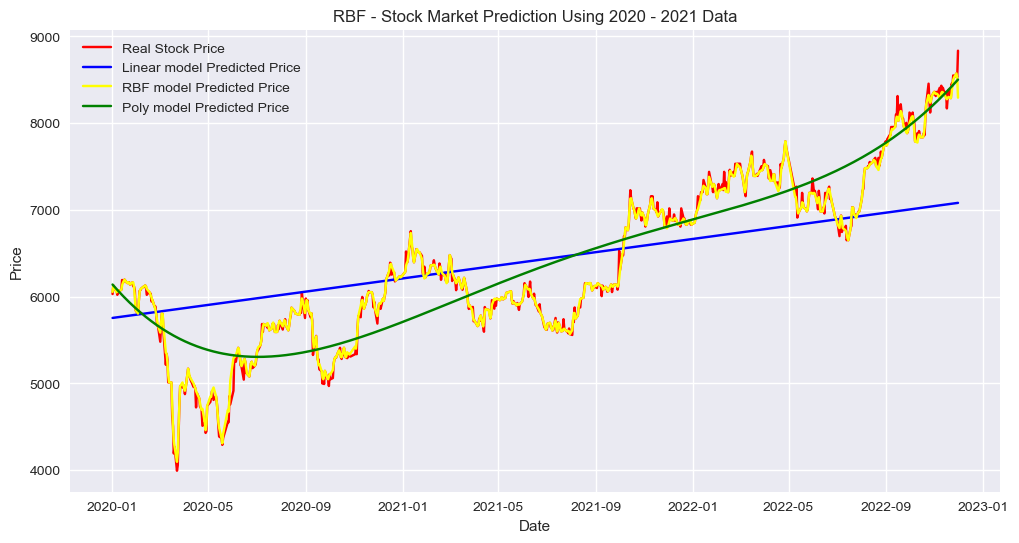

In [147]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2020 - 2021 Data')
plt.plot(test_dates_data, test_prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(test_actual_dates, SVR_linear_test, color= 'blue', label= 'Linear model Predicted Price')
plt.plot(test_actual_dates, SVR_rbfk_test, color= 'yellow', label= 'RBF model Predicted Price')
plt.plot(test_actual_dates, SVR_poly_test, color= 'green', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [148]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("SVR RBF Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_rbfk_train)))

print("SVR RBF Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_rbfk_train))

print("SVR RBF Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_rbfk_train))

print("SVR RBF Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_rbfk_test)))

print("SVR RBF Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_rbfk_test))

print("SVR RBF Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_rbfk_test))


SVR RBF Train RMSE: 32.14
SVR RBF Train R2 Score: 1.00
SVR RBF Train MAE Score: 11.33
SVR RBF Test RMSE: 56.80
SVR RBF Test R2 Score: 1.00
SVR RBF Test MAE Score: 27.29


In [149]:
print("SVR Linear Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_linear_train)))

print("SVR Linear Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_linear_train))

print("SVR Linear Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_linear_train))

print("SVR Linear Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_linear_test)))

print("SVR Linear Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_linear_test))

print("SVR Linear Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_linear_test))

SVR Linear Train RMSE: 486.32
SVR Linear Train R2 Score: 0.86
SVR Linear Train MAE Score: 352.54
SVR Linear Test RMSE: 651.45
SVR Linear Test R2 Score: 0.54
SVR Linear Test MAE Score: 538.09


In [150]:
print("SVR Poly Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_poly_train)))

print("SVR Poly Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_poly_train))

print("SVR Poly Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_poly_train))

print("SVR Poly Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_poly_test)))

print("SVR Poly Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_poly_test))

print("SVR Poly Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_poly_test))

SVR Poly Train RMSE: 161.60
SVR Poly Train R2 Score: 0.99
SVR Poly Train MAE Score: 122.26
SVR Poly Test RMSE: 413.84
SVR Poly Test R2 Score: 0.81
SVR Poly Test MAE Score: 337.79
